
# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

Dataframe URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv

<b>Data Dictionary</b>

-PatientId - Identification of a patient.<br>
-AppointmentID - Identification of each appointment.<br> 
-Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.<br> 
-AppointmentDay = The day of the actuall appointment, when they have to visit the doctor.<br> 
-ScheduledDay = The day someone called or registered the appointment, this is before appointment of course.<br> 
-Age = How old is the patient.<br> 
-Neighbourhood = Where the appointment takes place.<br> 
-Scholarship = Ture of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia.<br> 
-Hipertension = True or False.<br> 
-Diabetes = True or False.<br> 
-Alcoholism = True or False.<br> 
-Handcap = True or False.<br> 
-SMS_received = 1 or more messages sent to the patient.<br> 
-No-show = True or False.<br>

<a id='wrangling'></a>
## Data Wrangling


In [200]:
#declare libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io as io
import requests
import statsmodels.api as sm
%matplotlib inline

In [201]:
#read data from url
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv"
rq=requests.get(url).content
df=pd.read_csv(io.StringIO(rq.decode('utf-8')))

In [202]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [203]:
#first rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [204]:
#overall unique possible columns
for column in df.iloc[:,np.r_[2,5:14]].columns:
    print("{}:\n{}".format(column,df[column].unique()))

Gender:
['F' 'M']
Age:
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Neighbourhood:
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVE

In [205]:
#descriptive statistic
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

In [206]:
#convert date time columns to correctly type
df[['ScheduledDay','AppointmentDay']] = df[['ScheduledDay','AppointmentDay']].astype('datetime64[ns]')

In [207]:
#drop rows with inconsistency
df.drop(index=df[df.Age ==-1].index, inplace=True)

In [208]:
#improve No-show data
df.iloc[:,13].replace("No","1", inplace=True)
df.iloc[:,13].replace("Yes","0", inplace=True)
df.rename(columns = {'No-show':'Show'}, inplace = True)
df['Show'] = df['Show'].astype('int64')

In [209]:
#data information after data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
Show              110526 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 12.6+ MB


In [210]:
#compare difference between ScheduledDay and AppointmentDay
df[['ScheduledDay','AppointmentDay']].head()

,ScheduledDay,AppointmentDay
0,2016-04-29 18:38:08,2016-04-29
1,2016-04-29 16:08:27,2016-04-29
2,2016-04-29 16:19:04,2016-04-29
3,2016-04-29 17:29:31,2016-04-29
4,2016-04-29 16:07:23,2016-04-29


In [211]:
#create a function to get part of day from date time
def getpartday (currentTime):

    currentTime = int(currentTime.hour)   

    if currentTime < 12 :
        return 'morning'
    if currentTime > 12 :
        return 'afternoon' 
    if currentTime > 6 :
        return 'evening' 
#create a column to show the part of day from ScheduledDay
df['Part_day'] = df.ScheduledDay.apply(getpartday)

In [212]:
#create a function to age group
def getagegroup (currentAge):   

    if currentAge < 16 :
        return 'child (0–15)'
    if currentAge < 31 :
        return 'young adult (15–30)' 
    if currentAge < 51 :
        return 'middle-aged adult (31–50)' 
    else:
        return 'senior adult (>50)' 
#create a column to show age group
df['Age_group'] = df.Age.apply(getagegroup)


In [213]:
#get the most interesting columns to analyse
df_clean = df[['Gender','Age','Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received','Show','Part_day','Age_group']]

In [214]:
#create a mask to analyse more easily if people showed or not at ScheduledDay
show = df_clean.Show == True
no_show = df_clean.Show == False

In [215]:
#show dataframe cleaned
df_clean.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Show,Part_day,Age_group
0,F,62,0,1,0,0,0,1,afternoon,senior adult (>50)
1,M,56,0,0,0,0,0,1,afternoon,senior adult (>50)
2,F,62,0,0,0,0,0,1,afternoon,senior adult (>50)
3,F,8,0,0,0,0,0,1,afternoon,child (0–15)
4,F,56,0,1,1,0,0,1,afternoon,senior adult (>50)


In [216]:
#descriptive statistic
df_clean.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c332d6cc0>,
      dtype=object)

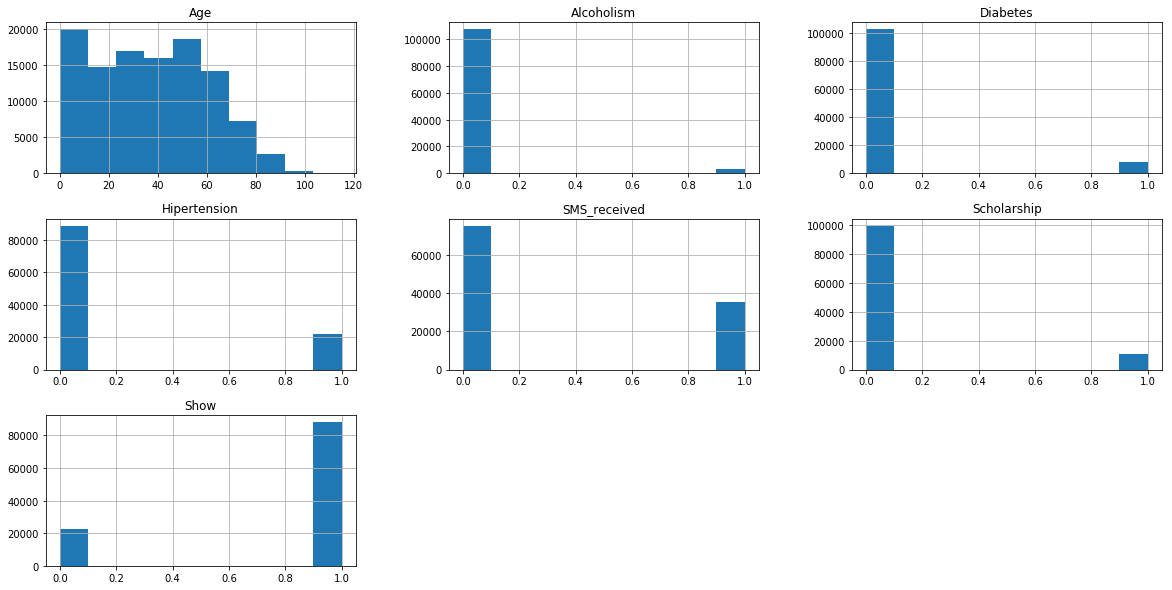

In [217]:
#variables frequency
df_clean[['Age','Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received','Show']].hist(figsize=(20,10))

<b>Plot comments:</b>

- There is a drop down of number of people over 60 yes old;
- There are fewer people with alcoholism, diabetes, hypertension, received sms and scholarship;
- There are more people who show up for their scheduled appointment.

Text(0.5,1,'Dataframe Variables Heatmap')

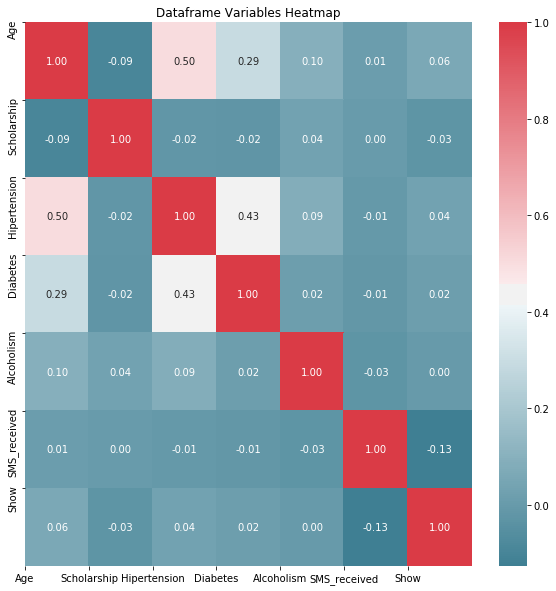

In [218]:
#check variables correlation
corr = df_clean.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
ax.set_title('Dataframe Variables Heatmap')


<b>Plot comments:</b>

-There is a reasonable correlation between age-hypertension, diabetes-hypertension and diabetes-age.

In [219]:
#check regression model
X = df[['Age','Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received']]
y = df["Show"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Show   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     385.7
Date:                Sat, 20 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:52:27   Log-Likelihood:                -54808.
No. Observations:              110526   AIC:                         1.096e+05
Df Residuals:                  110519   BIC:                         1.097e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7984      0.003    318.780      0.000       0.794       0.803
Age              0.0010   6.06e-05     16.712      0.000       0.001       0.001
Scholarship     -0.0314      0.004     -7.786      0.000      -0.039      -0.024
Hipertension     0.0094      0.004      2.534      0.011       0.002       0.017
Diabetes        -0.0127      0.005     -2.464      0.014      -0.023      -0.003
Alcoholism      -0.0200      0.007     -2.859      0.004      -0.034      -0.006
SMS_received    -0.1096      0.003    -42.773      0.000      -0.115      -0.105
==============================================================================
Omnibus:                    22029.646   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38528.982
Skew:                          -1.442   Prob(JB):                         0.00
Kurtosis:                       3.211   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Plot comments:</b>

-The variables do not explain attendance in scheduled appointment, there are low values to correlation and r-square.

<a id='eda'></a>
## Exploratory Data Analysis

### What part of the day has more appointment attendance?

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

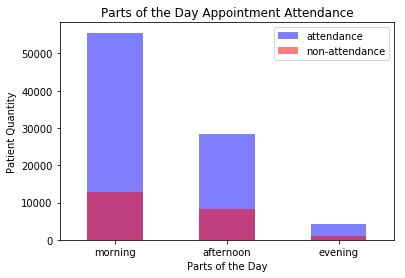

In [220]:
df_clean.Part_day[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df_clean.Part_day[no_show].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('Parts of the Day Appointment Attendance')
plt.xlabel('Parts of the Day')
plt.ylabel('Patient Quantity')
plt.xticks(rotation=0)

<b>Plot comments:</b>

-As we can see at above graph, the attendance percentage isn't to different between the parts of day. However, in the morning there's show up more for their scheduled appointment.

In [221]:
v_no_show = df_clean.loc[df_clean.Show == 0]
v_show = df_clean.loc[df_clean.Show == 1]

print('\033[1m' + "Attendance Percentage:")
for day in df_clean.Part_day.unique():
    print('\033[0m' + "{}: {:.2%}".format(day,len(v_show[v_show.Part_day==day]) / (len(v_show[v_show.Part_day==day])+len(v_no_show[v_no_show.Part_day==day]))))


Attendance Percentage:
afternoon: 77.33%
morning: 81.14%
evening: 79.64%


### What age group has more appointment attendance?

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

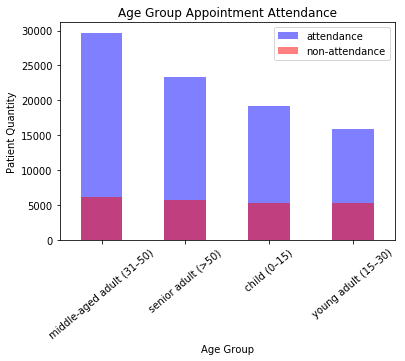

In [222]:
df_clean.Age_group[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df_clean.Age_group[no_show].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('Age Group Appointment Attendance')
plt.ylabel('Patient Quantity')
plt.xlabel('Age Group')
plt.xticks(rotation=40)

<b>Plot comments:</b>

-As we can see at above graph, the attendance percentage isn't to different between the age groups. However, the senior adult there's show up more for their scheduled appointment.

In [223]:
print('\033[1m' + "Attendance Percentage:")
for var in df_clean.Age_group.unique():
    print('\033[0m' + "{}: {:.2%}".format(var,len(v_show[v_show.Age_group==var]) / (len(v_show[v_show.Age_group==var])+len(v_no_show[v_no_show.Age_group==var]))))


Attendance Percentage:
senior adult (>50): 83.83%
child (0–15): 78.55%
young adult (15–30): 75.23%
middle-aged adult (31–50): 79.30%


### Is a scholarship a strong variable to impact appointment attendance?

(array([0, 1]), <a list of 2 Text xticklabel objects>)

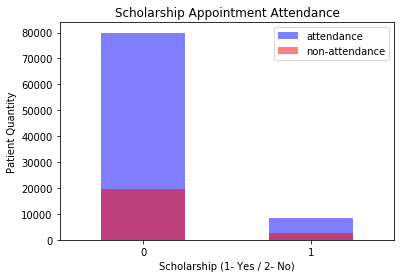

In [224]:
df_clean.Scholarship[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df_clean.Scholarship[no_show].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('Scholarship Appointment Attendance')
plt.xlabel('Scholarship (1- Yes / 2- No)')
plt.ylabel('Patient Quantity')
plt.xticks(rotation=0)

<b>Plot comments:</b>

-As we can see at above graph, the attendance percentage isn't to different between scholarship. However, people how hasn't scholarship show up more for their scheduled appointment.

In [225]:
print('\033[1m' + "Attendance Percentage:")
for var in df_clean.Scholarship.unique():
    print('\033[0m' + "{}: {:.2%}".format(var,len(v_show[v_show.Scholarship==var]) / (len(v_show[v_show.Scholarship==var])+len(v_no_show[v_no_show.Scholarship==var]))))


Attendance Percentage:
0: 80.19%
1: 76.26%


### Is a gender a strong variable to impact appointment attendance?

(array([0, 1]), <a list of 2 Text xticklabel objects>)

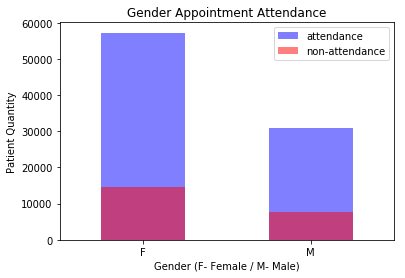

In [226]:
df_clean.Gender[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df_clean.Gender[no_show].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('Gender Appointment Attendance')
plt.xlabel('Gender (F- Female / M- Male)')
plt.ylabel('Patient Quantity')
plt.xticks(rotation=0)

<b>Plot comments:</b>

-As we can see at above graph, the attendance percentage isn't to different between gender. However, males show up more for their scheduled appointment.

In [227]:
print('\033[1m' + "Attendance Percentage:")
for var in df_clean.Gender.unique():
    print('\033[0m' + "{}: {:.2%}".format(var,len(v_show[v_show.Gender==var]) / (len(v_show[v_show.Gender==var])+len(v_no_show[v_no_show.Gender==var]))))


Attendance Percentage:
F: 79.69%
M: 80.03%


### Is a hipertension a strong variable to impact appointment attendance?

(array([0, 1]), <a list of 2 Text xticklabel objects>)

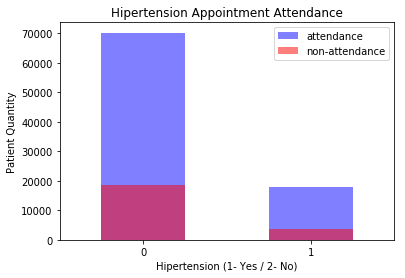

In [228]:
df_clean.Hipertension[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df_clean.Hipertension[no_show].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('Hipertension Appointment Attendance')
plt.xlabel('Hipertension (1- Yes / 2- No)')
plt.ylabel('Patient Quantity')
plt.xticks(rotation=0)

<b>Plot comments:</b>

-As we can see at above graph, the attendance percentage isn't to different between hipertension. However, people how has hipertension show up more for their scheduled appointment.

In [229]:
print('\033[1m' + "Attendance Percentage:")
for var in df_clean.Hipertension.unique():
    print('\033[0m' + "{}: {:.2%}".format(var,len(v_show[v_show.Hipertension==var]) / (len(v_show[v_show.Hipertension==var])+len(v_no_show[v_no_show.Hipertension==var]))))


Attendance Percentage:
1: 82.70%
0: 79.10%


### Is a diabetes a strong variable to impact appointment attendance?

(array([0, 1]), <a list of 2 Text xticklabel objects>)

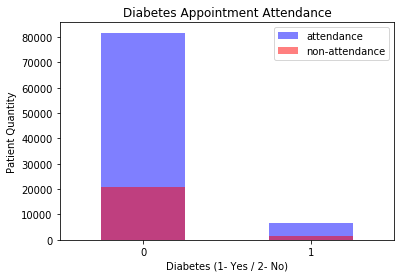

In [230]:
df_clean.Diabetes[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df_clean.Diabetes[no_show].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('Diabetes Appointment Attendance')
plt.xlabel('Diabetes (1- Yes / 2- No)')
plt.ylabel('Patient Quantity')
plt.xticks(rotation=0)

<b>Plot comments:</b>

-As we can see at above graph, the attendance percentage isn't to different between diabetes. However, people how has diabetes show up more for their scheduled appointment.

In [231]:
print('\033[1m' + "Attendance Percentage:")
for var in df_clean.Diabetes.unique():
    print('\033[0m' + "{}: {:.2%}".format(var,len(v_show[v_show.Diabetes==var]) / (len(v_show[v_show.Diabetes==var])+len(v_no_show[v_no_show.Diabetes==var]))))


Attendance Percentage:
0: 79.64%
1: 82.00%


### Is a alcoholism a strong variable to impact appointment attendance?

(array([0, 1]), <a list of 2 Text xticklabel objects>)

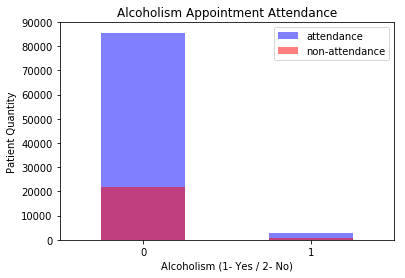

In [232]:
df_clean.Alcoholism[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df_clean.Alcoholism[no_show].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('Alcoholism Appointment Attendance')
plt.xlabel('Alcoholism (1- Yes / 2- No)')
plt.ylabel('Patient Quantity')
plt.xticks(rotation=0)

<b>Plot comments:</b>

-As we can see at above graph, the attendance percentage isn't to different between alcoholism. However, people how has alcoholism show up more for their scheduled appointment.

In [233]:
print('\033[1m' + "Attendance Percentage:")
for var in df_clean.Alcoholism.unique():
    print('\033[0m' + "{}: {:.2%}".format(var,len(v_show[v_show.Alcoholism==var]) / (len(v_show[v_show.Alcoholism==var])+len(v_no_show[v_no_show.Alcoholism==var]))))


Attendance Percentage:
0: 79.81%
1: 79.85%


### Is a sms_received a strong variable to impact appointment attendance?

(array([0, 1]), <a list of 2 Text xticklabel objects>)

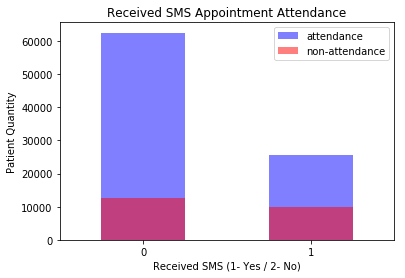

In [234]:
df_clean.SMS_received[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df_clean.SMS_received[no_show].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('Received SMS Appointment Attendance')
plt.xlabel('Received SMS (1- Yes / 2- No)')
plt.ylabel('Patient Quantity')
plt.xticks(rotation=0)

<b>Plot comments:</b>

-As we can see at above graph, the attendance percentage isn't to different between received a SMS. However, people how hasn't received a SMS show up more for their scheduled appointment.

In [235]:
print('\033[1m' + "Attendance Percentage:")
for var in df_clean.SMS_received.unique():
    print('\033[0m' + "{}: {:.2%}".format(var,len(v_show[v_show.SMS_received==var]) / (len(v_show[v_show.SMS_received==var])+len(v_no_show[v_no_show.SMS_received==var]))))


Attendance Percentage:
0: 83.30%
1: 72.43%


<a id='conclusions'></a>
## Conclusions

<b>Through Data Wrangling procedure, the following analyzes were carried out:</b>
- analyzed the data information to verify if there were null and non-formatted values:
    - columns that refer to dates had their data type changed.
- checked the structure of the data in the first lines;
- checked unique data possibilities for each column;
- used descriptive statistics to find issues on rows:
    - patient of age -1 was excluded.
- other procedures:
    - created parts of the day schedule classification;
    - created age group;
    - selected columns to analyze;
    - created mask for ease analysis of people who attend the scheduled appointment;
    - verified the frequency of variables:
        - there are fewer people starting at age 70;
        - people with alcoholism, diabetes, hypertension, receiving sms and scholarship have lower predominance;
        - there are more people that show up for their scheduled appointment.
    - verified the correlation of variables:
        - there is a reasonable correlation between age-hypertension, diabetes-hypertension and diabetes-age.
    - regression analysis:
        - available variables do not explain attendance in scheduled appointment.

<b>Through Exploratory Data Analysis procedure:</b>
- people more show up for their scheduled appointment in the morning;
- people in the senior adult group, over 50 years of age, more show up for their scheduled appointment;
- people without scholarship more show up for their scheduled appointment;
- male gender more show up for their scheduled appointment;
- people with hypertension more show up for their scheduled appointment;
- people with diabetes more show up for their scheduled appointment;
- people with alcoholism more show up for their scheduled appointment;
- people who did not receive sms more show up for their scheduled appointment.